In [15]:
import pandas as pd

In [16]:
data = pd.read_csv('./credit_fraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


数据解读：
* Time 是交易时间，每一笔交易和第一笔交易的时间间隔
* V1-V28 是一些用户的隐私数据，并且是已经 PCA 处理过的，而 Time 和 Amount 则没有PCA 处理过
* Class 代表欺诈类型，1即为欺诈，0为非欺诈

数据集包括了 2013 年 9 月份两天时间内的欧洲信用卡持有者的信用卡交易数据，284807 笔交易中，一共有 492 笔是欺诈行为。所占比例为0.172%，数据分布非常不平衡，所以使用混淆矩阵来对此不均衡的样本进行处理是没有意义的，我们应该使用精确率-召回率下的面积来进行计算。 Area Under the Precision-Recall Curve (AUPRC).

根据实际场景，了解到在交易时间和是否欺诈并没有太大的关系，而 Amount 交易金额有相关的关系。所以我们需要对 Amount 进行数据规范化，方便进行处理。

另外，本次数据集没有划分训练集和测试集，所以我们需要使用 train_test_split 工具来划分训练集和测试集。

In [17]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [18]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
cls = data['Class'].value_counts()
print(cls)

0    284315
1       492
Name: Class, dtype: int64


# 信用卡欺诈分析
## 导入相关库

In [20]:
# 导入创建模型相关的库
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 导入数据分析类的画图库
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

## 数据加载

### 数据探索

首先，先对数据进行一番探索，将信用卡欺诈和非欺诈的用户用一个柱状图表示出来，同时，按照时间轴将欺诈事件和正常事件表现出来，观察欺诈是怎么随着事件分布的。

总交易笔数:  284807
诈骗交易笔数： 492
诈骗交易比例：0.001727


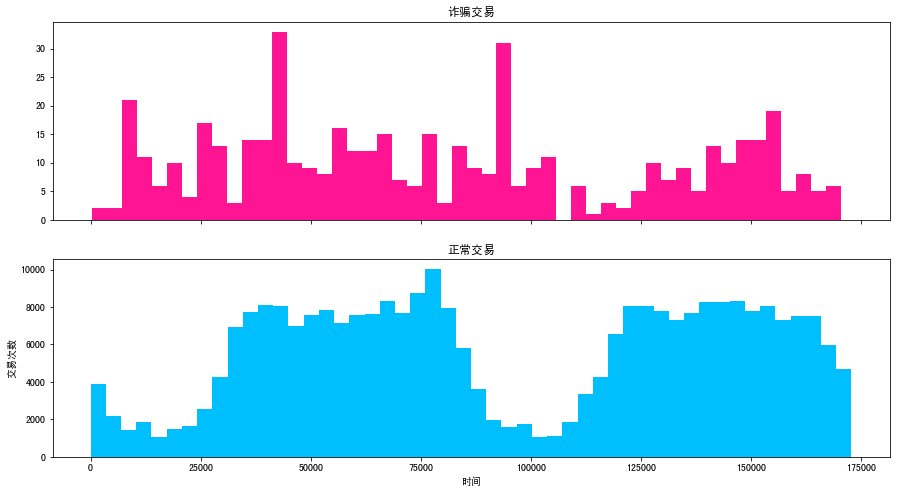

In [21]:
data = pd.read_csv('./credit_fraud/creditcard.csv')
# 显示交易笔数，欺诈交易笔数
num = len(data)
num_fraud = len(data[data['Class']==1]) # 创建一个诈骗的dataframe
print('总交易笔数: ', num)
print('诈骗交易笔数：', num_fraud)
print('诈骗交易比例：{:.6f}'.format(num_fraud/num))
# 欺诈和正常交易可视化
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 50
ax1.hist(data.Time[data.Class == 1], bins = bins, color = 'deeppink')
ax1.set_title('诈骗交易')
ax2.hist(data.Time[data.Class == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

In [22]:
?ax1.hist

In [23]:
data = pd.read_csv('./credit_fraud/creditcard.csv')
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

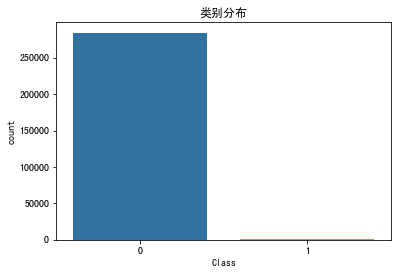

In [24]:
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 绘制类别分布
plt.figure()
sns.countplot(x = 'Class',data = data)
plt.title('类别分布')
plt.show()

In [25]:
?sns.countplot

In [26]:
# 混淆矩阵可视化
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
 
# 显示模型评估结果
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('精确率: {:.3f}'.format(tp/(tp+fp)))
    print('召回率: {:.3f}'.format(tp/(tp+fn)))
    print('F1值: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))
# 绘制精确率-召回率曲线
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show();

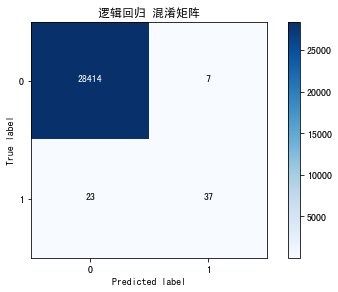

精确率: 0.841
召回率: 0.617
F1值: 0.712


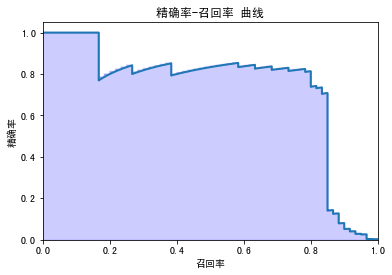

In [27]:
# 对 Amount 进行数据规范化
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# 特征选择
y = np.array(data.Class.tolist())
data = data.drop(['Time','Amount','Class'],axis=1)
X = np.array(data.as_matrix())
# 准备训练集和测试集
train_x, test_x, train_y, test_y = train_test_split (X, y, test_size = 0.1, random_state = 33)
 
# 逻辑回归分类
clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
# 预测样本的置信分数
score_y = clf.decision_function(test_x)  
# 计算混淆矩阵，并显示
cm = confusion_matrix(test_y, predict_y)
class_names = [0,1]
# 显示混淆矩阵
plot_confusion_matrix(cm, classes = class_names, title = '逻辑回归 混淆矩阵')
# 显示模型评估分数
show_metrics()
# 计算精确率，召回率，阈值用于可视化
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall()